# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

Ejercicio 1

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

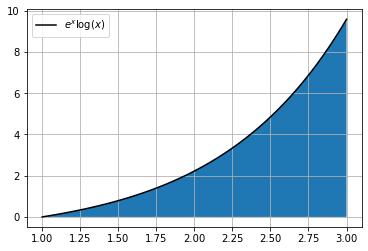

In [3]:
# Graficamos
x = np.linspace(1, 3, 100)
y = np.exp(x)*np.log10(x)
plt.figure()
plt.plot(x, y, "k", label="$e^{x}\log(x)$")
plt.fill_between(x, y)
plt.legend(loc="best")
plt.grid()

In [4]:
def f(x) :
    return np.exp(x)*np.log10(x)

N = 100
u = np.random.uniform(1, 3, N) # Generar "N" valores aleatorios con distribución uniforme entre 1 y 3
funcion_evaluada = f(u)
np.mean(funcion_evaluada)

3.335367218521172

In [5]:
N = np.logspace(1, 5, 5) # Genera 5 elementos desde 10^1 hasta 10^5 
table = pd.DataFrame(columns=["Aproximación", "Error"], index=N)
table

,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [6]:
def montecarlo(f, a, b, N) :
    u = np.random.uniform(a, b, size=N)
    return((b-a)*np.mean(f(u)))

In [7]:
for i in N :
    table.loc[i, "Aproximación"] = montecarlo(f, 1, 3, int(i))
table["Error"] = (6.09207) - table["Aproximación"]
table

,Aproximación,Error
10.0,6.211228,-0.119158
100.0,6.443916,-0.351846
1000.0,6.350474,-0.258404
10000.0,6.078906,0.013164
100000.0,6.094525,-0.002455


Ejercicio 2

In [8]:
def f1(x) :
    return np.sin(x)*np.log(x)

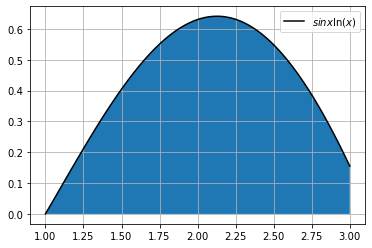

In [9]:
# Graficamos
x = np.linspace(1, 3, 100)
y = f1(x)
plt.figure()
plt.plot(x, y, "k", label="$sin{x}\ln(x)$")
plt.fill_between(x, y)
plt.legend(loc="best")
plt.grid()

In [10]:
N = np.logspace(1, 5, 5) # Genera 5 elementos desde 10^1 hasta 10^5 
table2 = pd.DataFrame(columns=["Aproximación", "Error"], index=N)
table2

,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [11]:
for i in N :
    table2.loc[i, "Aproximación"] = montecarlo(f1, 1, 3, int(i))
table2["Error"] = (0.869848) - table2["Aproximación"]
table2

,Aproximación,Error
10.0,0.952324,-0.082476
100.0,0.86885,0.000998
1000.0,0.88443,-0.014582
10000.0,0.873208,-0.00336
100000.0,0.868812,0.001036


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [13]:
def region(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

'c y el simbolo ~ es para no colorear lo que está en la region, \nel negro es no color para la computadora y el blanco es color'

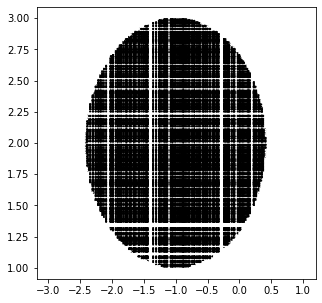

In [15]:
#Para hacer el cuadrado de la gráfica
a1, b1 = -3, 1
a2, b2 = 1, 3

x = np.random.uniform(a1, b1, size=300)
y = np.random.uniform(a2, b2, size=300)
X, Y = np.meshgrid(x, y) #
plt.figure(figsize=(5, 5))
plt.scatter(X, Y, c=~region(X, Y), cmap="gray", s=1) 
'''c y el simbolo ~ es para no colorear lo que está en la region, 
el negro es no color para la computadora y el blanco es color'''

In [16]:
def montecarlo2(region, a1, b1, a2, b2, N):
    x = np.random.uniform(a1, b1, size=N)
    y = np.random.uniform(a2, b2, size=N)
    AR = (b1-a1)*(b2-a2) #Tamaño del area del rectangulo
    B = region(x, y) #Nos regresa verdadero si está en la región
    return np.mean(B)*AR # Proporción de dardos que entraron en la región que queremos  

In [17]:
N = np.logspace(1, 5, 5)
tabla = pd.DataFrame(index=N, columns=["Area"])
tabla

,Area
10.0,NaN
100.0,NaN
1000.0,NaN
10000.0,NaN
100000.0,NaN


In [18]:
for i in N:
    tabla.loc[i, "Area"] = montecarlo2(region, a1, b1, a2, b2, int(i))
tabla

,Area
10.0,5.6
100.0,4.64
1000.0,4.456
10000.0,4.4704
100000.0,4.43192
